In [49]:
#importing necessary packages
import numpy as np
import pandas as pd
from scipy import stats 
import math
import statsmodels.api as sm 
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('analytic_data2019.csv')
pd.set_option('display.max_columns', None)

C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [3]:
df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [4]:
df = df.drop(df.index[0])

In [5]:
#checking shape
df.shape

(3194, 534)

In [6]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [7]:
#checking for null values
df.isnull().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [8]:
df_columns = df.columns
df_columns = list(df_columns)
# df_columns

In [9]:
df.describe()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [10]:
filter_out = ['White','white','Black','black','Hispanic','hispanic','CI', 'numerator', 'denominator']
for f in filter_out:
        df = df.loc[:, ~df.columns.str.contains(f)]

In [11]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Poor_or_fair_health_raw_value', 'Poor_physical_health_days_raw_value']


In [12]:
df1=df[['State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)']]
df2 = df.iloc[:,7:].astype(float)
dfclean = df1.merge(df2, left_index=True,right_index=True)
dfclean.head()


,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Disconnected_youth_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw_value,Coronary_heart_disease_hospitalizations_raw_value,Cerebrovascular_disease_hospitalizations_raw_value,Smoking_during_pregnancy_raw_value,Drug_arrests_raw_value,Opioid_hospital_visits_raw_value,Alcohol-related_hospitalizations_raw_value,Motor_vehicle_crash_occupancy_rate_raw_value,On-road_motor_vehicle_crash-related_ER_visits_raw_value,Off-road_motor_vehicle_crash-related_ER_visits_raw_value,Childhood_immunizations_raw_value,Reading_proficiency_raw_value,W-2_enrollment_raw_value,Poverty_raw_value,Older_adults_living_alone_raw_value,Hate_crimes_raw_value,Child_abuse_raw_value,Injury_hospitalizations_raw_value,Fall_fatalities_65+_raw_value,Year_structure_built_raw_value,Male_population_0-17_raw_value,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value
1,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,0.080893,NaN,0.285,7.7,0.222,0.838945,NaN,0.285715,497.3,24.710326,0.100089,0.000754,1325.716601,0.000684,1461.331847,0.002287,437.275036,NaN,NaN,NaN,0.846000,0.652256,0.043556,0.184,4.941486,0.332517,9.300353,386.464896,67.387264,NaN,NaN,0.183731,NaN,NaN,NaN,0.764422,0.352,79.063850

In [13]:
dfclean.dropna(axis=0, subset=['County_Ranked_(Yes=1/No=0)'], inplace=True)
dfclean = dfclean.drop(columns = ['County_Ranked_(Yes=1/No=0)'])

In [15]:
#checking the data types for each column
for col in dfclean.columns:
    print(dfclean[col].dtypes, col)

object State_Abbreviation
object Name
object Release_Year
float64 Premature_death_raw_value
float64 Poor_or_fair_health_raw_value
float64 Poor_physical_health_days_raw_value
float64 Poor_mental_health_days_raw_value
float64 Low_birthweight_raw_value
float64 Adult_smoking_raw_value
float64 Adult_obesity_raw_value
float64 Food_environment_index_raw_value
float64 Physical_inactivity_raw_value
float64 Access_to_exercise_opportunities_raw_value
float64 Excessive_drinking_raw_value
float64 Alcohol-impaired_driving_deaths_raw_value
float64 Sexually_transmitted_infections_raw_value
float64 Teen_births_raw_value
float64 Uninsured_raw_value
float64 Primary_care_physicians_raw_value
float64 Ratio_of_population_to_primary_care_physicians.
float64 Dentists_raw_value
float64 Ratio_of_population_to_dentists.
float64 Mental_health_providers_raw_value
float64 Ratio_of_population_to_mental_health_providers.
float64 Preventable_hospital_stays_raw_value
float64 Mammography_screening_raw_value
float64 Flu_

In [16]:
# checking for missing values in each column
for cols in dfclean:
    print(dfclean[cols].name)
    print(dfclean[cols].isna().sum())

State_Abbreviation
0
Name
0
Release_Year
0
Premature_death_raw_value
61
Poor_or_fair_health_raw_value
0
Poor_physical_health_days_raw_value
0
Poor_mental_health_days_raw_value
0
Low_birthweight_raw_value
107
Adult_smoking_raw_value
0
Adult_obesity_raw_value
0
Food_environment_index_raw_value
19
Physical_inactivity_raw_value
0
Access_to_exercise_opportunities_raw_value
6
Excessive_drinking_raw_value
0
Alcohol-impaired_driving_deaths_raw_value
33
Sexually_transmitted_infections_raw_value
158
Teen_births_raw_value
144
Uninsured_raw_value
1
Primary_care_physicians_raw_value
135
Ratio_of_population_to_primary_care_physicians.
135
Dentists_raw_value
85
Ratio_of_population_to_dentists.
85
Mental_health_providers_raw_value
252
Ratio_of_population_to_mental_health_providers.
252
Preventable_hospital_stays_raw_value
38
Mammography_screening_raw_value
19
Flu_vaccinations_raw_value
16
High_school_graduation_raw_value
99
Some_college_raw_value
0
Unemployment_raw_value
1
Children_in_poverty_raw_valu

In [18]:
#dropping columns with more than 50 percent of missing values
for cols in dfclean:
    if (dfclean[cols].isna().sum()/len(dfclean))*100 > 50:
        dfclean.drop([cols], axis=1, inplace=True)

In [21]:
dfreg = dfclean
dfreg.iloc[:,1:] = dfreg.groupby("State_Abbreviation").transform(lambda x: x.fillna(x.median()))
dfreg = dfreg.drop(columns = ['Name', 'Release_Year'])
dfreg = dfreg.dropna(axis='columns')
dfreg


,State_Abbreviation,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Median_household_income_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
3,AL,8824.057123,0.184111,4.200578,4.306739,0.084757,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,2409.391304,0.000324,3083.555556,0.000162,6167.111111,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,0.149546,0.132052,0.024516,0.006374,0.859651,0.383,76.330589,438.7,53.279441,0.128244,0.126384,0.142,0.134,0.119911,9.623076,20.377158,0.359054,0.109611,0.024762,0.000306,3264.941176,58343.0,17.7,0.732877,0.126452,55504.0,0.239370,0.151196,0.004756,0.012792,0.001045,0.008285,0.513422,0.420022
4,AL,7224.632160,0.180605,4.098748,4.249649,0.083387,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,1372.125000,0.000499,2005.924528,0.000912,1096.020619,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,0.138317,0.125693,0.010728,0.006072,0.847194,0.405,78.599498,348.4,47.000017,0.126220,0.128226,0.113,0.123,0.054244,16.322612,15.092364,0.333059,0.135703,0.032380,0.000522,1915.567568,56607.0,14.4,0.728593,0.127959,212628.0,0.218485,0.199470,0.007760,0.011565,0.000687,0.004545,0.514528,0.422791
5,AL,9586.165037,0.257734,5.067438,4.634994,0.109526,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,2596.500000,0.000356,2807.777778,0.000079,12635.000000,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,0.154555,0.136743,0.020065,0.008134,0.834044,0.338,75.779457,469.8,77.080027,0.162162,0.146323,0.180,0.232,0.107397,14.416200,20.966953,0.385632,0.165422,0.029014,0.000237,4211.666667,32490.0,15.2,0.625068,0.135868,25270.0,0.207638,0.188247,0.006529,0.004630,0.001860,0.011993,0.472299,0.677

In [22]:
for col in dfreg.columns:
    print(dfreg[col].isna().sum(), col)

0 State_Abbreviation
0 Premature_death_raw_value
0 Poor_or_fair_health_raw_value
0 Poor_physical_health_days_raw_value
0 Poor_mental_health_days_raw_value
0 Low_birthweight_raw_value
0 Adult_smoking_raw_value
0 Adult_obesity_raw_value
0 Food_environment_index_raw_value
0 Physical_inactivity_raw_value
0 Access_to_exercise_opportunities_raw_value
0 Excessive_drinking_raw_value
0 Alcohol-impaired_driving_deaths_raw_value
0 Sexually_transmitted_infections_raw_value
0 Teen_births_raw_value
0 Uninsured_raw_value
0 Primary_care_physicians_raw_value
0 Ratio_of_population_to_primary_care_physicians.
0 Dentists_raw_value
0 Ratio_of_population_to_dentists.
0 Mental_health_providers_raw_value
0 Ratio_of_population_to_mental_health_providers.
0 Preventable_hospital_stays_raw_value
0 Mammography_screening_raw_value
0 Flu_vaccinations_raw_value
0 High_school_graduation_raw_value
0 Some_college_raw_value
0 Unemployment_raw_value
0 Children_in_poverty_raw_value
0 Income_inequality_raw_value
0 Children_

In [23]:
dfreg.describe()

,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Severe_housing_problems_raw_value,Percentage_of_households_with_high_housing_costs,Percentage_of_households_with_overcrowding,Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Ratio_of_population_to_primary_care_providers_other_than_physicians.,Median_household_income_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,%_below_18_years_of_age_raw_value,%_65_and_older_raw_value,%_American_Indian_and_Alaskan_Native_raw_value,%_Asian_raw_value,%_Native_Hawaiian/Other_Pacific_Islander_raw_value,%_not_proficient_in_English_raw_value,%_Females_raw_value,%_Rural_raw_value
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,8462.386017,0.174833,3.922021,3.932145,0.080756,0.178726,0.320715,7.467696,0.257000,0.629375,0.174114,0.293115,379.214258,31.897495,0.111365,0.000543,2567.700085,0.000451,2824.265502,0.001441,1829.769703,4811.877626,0.399346,0.404095,0.882564,0.576105,0.046180,0.215475,4.515198,0.323924,13.783436,248.846771,85.000795,0.142363,0.114254,0.024131,0.012605,0.795246,0.309554,77.469110,406.036362,60.997345,0.119901,0.122096,0.116264,0.136975,0.086297,18.783843,18.913694,0.330426,0.132854,0.058620,0.000769,1848.552310,51098.339115,14.785582,0.713382,0.114958,1.036662e+05,0.222349,0.188134,0.023302,0.015272,0.001369,0.017312,0.498935,0.586348
std,2713.205981,0.046994,0.714456,0.613682,0.020314,0.036601,0.045890,1.163198,0.051734,0.230832,0.032429,0.151693,251.207171,14.879810,0.049407,0.000346,2423.334911,0.000310,2580.291853,0.001562,2444.971239,1864.904757,0.075466,0.097859,0.073808,0.117017,0.016762,0.091222,0.745076,0.105321,7.058535,187.893363,25.39

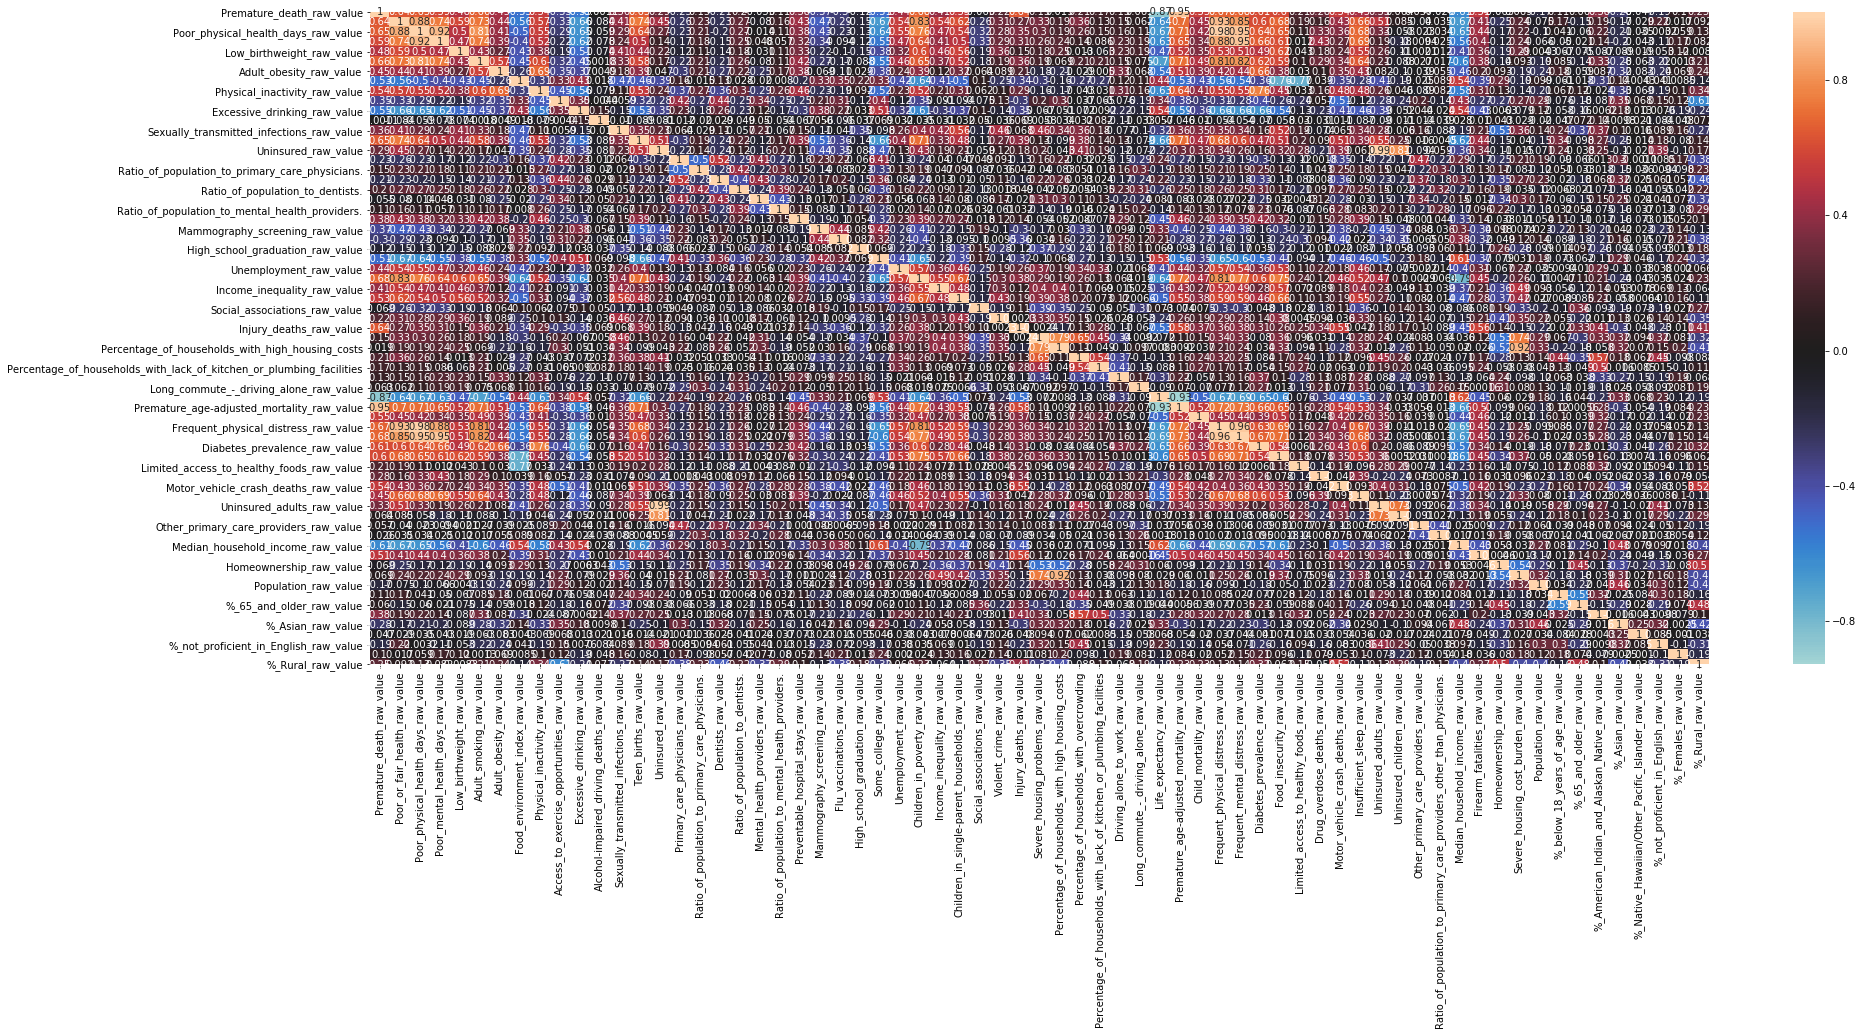

In [27]:
# creating a heatmap to see correlation between variables
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(30,12))
sns.heatmap(dfreg.corr(), center=0, annot=True)

In [29]:
corr_matrix = dfreg.corr()

In [31]:
corr_matrix["Poor_mental_health_days_raw_value"].abs().sort_values(ascending=False)[:60]

Poor_mental_health_days_raw_value                                       1.000000
Frequent_mental_distress_raw_value                                      0.953254
Poor_physical_health_days_raw_value                                     0.919823
Frequent_physical_distress_raw_value                                    0.878407
Poor_or_fair_health_raw_value                                           0.743129
Adult_smoking_raw_value                                                 0.739957
Insufficient_sleep_raw_value                                            0.691513
Diabetes_prevalence_raw_value                                           0.655154
Premature_age-adjusted_mortality_raw_value                              0.647103
Children_in_poverty_raw_value                                           0.638065
Life_expectancy_raw_value                                               0.633379
Excessive_drinking_raw_value                                            0.620358
Food_insecurity_raw_value   

In [34]:
# removed any value higher than 0.73
dfreg1 = dfreg.drop(["Frequent_mental_distress_raw_value","Poor_physical_health_days_raw_value","Frequent_physical_distress_raw_value","Poor_or_fair_health_raw_value","Adult_smoking_raw_value"], axis=1)

# Modeling

In [54]:
X = dfreg[['Unemployment_raw_value', 'Median_household_income_raw_value']]
y = dfreg['Poor_mental_health_days_raw_value']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    train_size=0.75)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)

# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d" % 1, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

degree 1 0.4493987467942172


In [57]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [ 0.00000000e+00  2.33264348e+01 -5.94093497e-05 -1.08589301e+02
 -5.20220947e-06  3.26223366e-10]
Train Mean Squarred Error: 0.21219333573677104
r_squared_score: 0.4357037217379409


In [58]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)

lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_train.shape

(2356,)

In [60]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [61]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_scaled)
y_h_ridge_test = ridge.predict(X_test_scaled)

y_h_lasso_train = np.reshape(lasso.predict(X_train_scaled), (2356, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_scaled), (786, 1))

y_h_lin_train = lin.predict(X_train_scaled)
y_h_lin_test = lin.predict(X_test_scaled)

In [62]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_scaled))**2))

Train Error Ridge Model 2874499.313175642
Test Error Ridge Model 315228.43878502777


Train Error Lasso Model 885.9308810887928
Test Error Lasso Model 297.45793582168665


Train Error Unpenalized Linear Model 2874745.181527677
Test Error Unpenalized Linear Model 315254.0383887091


In [63]:
# Ridge 
for i in np.arange(1,10):
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    print('Training R r^2:', ridge.score(X_train, y_train))
    print('Training R MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
    print('\n')

# Lasso
for i in np.arange(1,11):
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    print('Training L r^2:', lasso.score(X_train, y_train))
    print('Training L MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
    print('\n')

Training R r^2: 0.3476490648454341
Training R MSE: 0.24530468538225064


Training R r^2: 0.333017209901751
Training R MSE: 0.2508067278874377


Training R r^2: 0.32565279216081455
Training R MSE: 0.25357598302238404


Training R r^2: 0.32126155391134037
Training R MSE: 0.2552272281715468


Training R r^2: 0.3183524620512972
Training R MSE: 0.25632113917101046


Training R r^2: 0.3162853449512517
Training R MSE: 0.25709844090010936


Training R r^2: 0.31474151603622647
Training R MSE: 0.25767896963989656


Training R r^2: 0.3135448560266949
Training R MSE: 0.2581289518370986


Training R r^2: 0.3125902160764158
Training R MSE: 0.25848792679986315


Training L r^2: 0.3041166840820946
Training L MSE: 0.261674244145221


Training L r^2: 0.3041166414417882
Training L MSE: 0.2616742601793315


Training L r^2: 0.3041165703746105
Training L MSE: 0.261674286902849


Training L r^2: 0.30411647088056193
Training L MSE: 0.26167432431577353


Training L r^2: 0.30411634295964257
Training L MSE: 0.26

# Building a Base model

In [44]:
#Splitting Datasets into Training and Testing, ensuring that testing size is at least 1000 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.45, random_state=42)

In [50]:
# standardising the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
feature_scaled = scaler.fit_transform(X_train)


# put them all in the DF
X_scaled = pd.DataFrame(feature_scaled, columns=X_train.columns)
all_train = pd.concat([X_scaled, y_train], axis=1)

In [51]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)

# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d" % 1, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

degree 1 0.8672191011824997


In [52]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [ 0.00000000e+00  1.16877975e+01  2.85854864e-05  1.57993917e+00
 -1.32523323e+01 -8.95298698e-05 -1.66342166e+00 -1.02033363e-10
 -2.41226424e-06 -6.51810088e-02]
Train Mean Squarred Error: 0.053655248378531056
r_squared_score: 0.8573119327046581


In [46]:
# K-fold crossvalidation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

crossvalidation = KFold(n_splits=7, shuffle=True, random_state=42)
baseline = np.mean(cross_val_score(regression, X_scaled, y_train, scoring="r2", cv=crossvalidation))
baseline

NameError: name 'X_scaled' is not defined

### MODELLING

In [ ]:
X_step = dfclean
X_step_clean = X_step.drop(columns = ['State_FIPS_Code','County_FIPS_Code','5-digit_FIPS_Code','State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)'])
y_step = list(dfclean['Poor_mental_health_days_raw_value'])
def stepwise_selection(X_step_clean, y_step, 
                       initial_list=[], 
                       threshold_in=0.0000001, 
                       threshold_out = 0.005, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_step_clean.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step_clean[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_step_clean, dfclean['Poor_mental_health_days_raw_value'], verbose=True)
print('resulting features:')
print(result)